## Analisis de tendencia de Post y Tags

In [1]:
#importa pandas para usarlo como pd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#recupera el archivo PostA desde hadoop
postQTags = pd.read_csv('PostQTagsId.csv')

In [3]:
# muestra los resultados del DataFrame
postQTags.head(364696)

,Unnamed: 0,Tags,Id
0,0,.net,1
1,1,asp.net-web-api,1
2,2,asp.net,1
3,3,delphi,3
4,4,c++,5
...,...,...,...
364691,364691,email,431641
364692,364692,powershell,431641
364693,364693,codificación,431641
364694,364694,outlook,431641


In [4]:
postQTags.count()

Unnamed: 0    364697
Tags          364622
Id            364697
dtype: int64

In [5]:
# Ordenar los Tags alfabeticamene y guardarlos
pqtGB = postQTags.sort_values(by='Tags', ascending=True)
pqtGB.to_csv("PostQTagsOrdenadoXTag.csv")

## Quita los tags con NaN y les pone "null"

In [6]:
pqtGB.fillna('null', inplace=True)

In [7]:
pqtGB[pqtGB.Tags == 'null'].count()

Unnamed: 0    75
Tags          75
Id            75
dtype: int64

In [8]:
pqtGB = postQTags.groupby(['Tags']).size().reset_index(name='Usos').sort_values(by='Usos', ascending=False)
pqtGB.to_csv("PostQTagsAgrupadoXTag.csv")
pqtGB.head(2689)

,Tags,Usos
1752,php,24129
1204,javascript,23924
1183,java,17363
1056,html,12914
1543,mysql,11454
...,...,...
654,dplyr,1
653,doxygen,1
1771,pie,1
2442,ucfirst,1


In [11]:
pqtGB.count()

Tags    2689
Usos    2689
dtype: int64

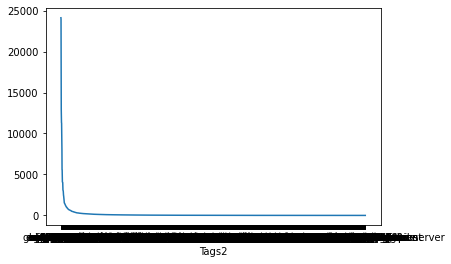

In [31]:
plt.plot(pqtGB["Tags"],pqtGB["Usos"])
plt.xlabel("Tags2")
plt.show()

In [35]:
plt.savefig("Tendencia.jpg", dpi =300)

<Figure size 432x288 with 0 Axes>

In [47]:
# Toma una muestra de 20 registros random
p1 = pqtGB[0:29]

In [48]:
print(p1)

                Tags   Usos
1752             php  24129
1204      javascript  23924
1183            java  17363
1056            html  12914
1543           mysql  11454
331               c#  11325
1899          python  11286
1256          jquery   9199
68           android   9061
2239             sql   8030
1327         laravel   5585
519              css   5569
101   android-studio   4175
1063           html5   4085
47              ajax   4058
1906      python-3.x   4049
2240      sql-server   4015
333              c++   3420
1274            json   3088
181            array   3050
1603          nodejs   3016
111          angular   2906
248    base-de-datos   2590
193          asp.net   2454
330                c   2399
292        bootstrap   2282
622           django   2128
1329       laravel-5   1950
1971         reactjs   1837


In [53]:
#len = cantidad de etiquetas (hay 2689 Tags distintos)
# min = el minimo uso de un tag
# max = el maximo uso de un tag
pqtGB.Usos.agg([len, min, max])

len     2689
min        1
max    24129
Name: Usos, dtype: int64

In [54]:
# count = para cuantos registros aplica
# mean 
# std = 
# min = valor minimo de aparición de un tags
# max = valor maximo de aparición de un tags
# 25% , 50% y 75% son 1º, 2º y 3º cuartil respectivamente.
# el primer 25% de los count tiene 4.
# el 50 % tiene 12 counts
# el 75 % tiene 47 counts

pqtGB.describe()

,Usos
count,2689.000000
mean,135.597620
std,963.879369
min,1.000000
25%,4.000000
50%,12.000000
75%,47.000000
max,24129.000000


In [121]:
# Porcentajes respecto del total filtrado

In [ ]:
# Porcentajes respecto del total sobre Tags

<AxesSubplot:>

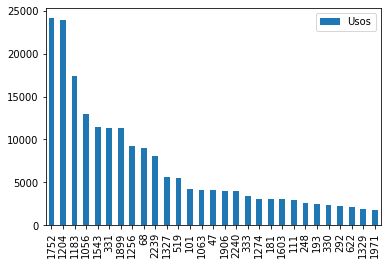

In [59]:
p1.sort_values(by='Usos', ascending=False).plot(kind='bar')

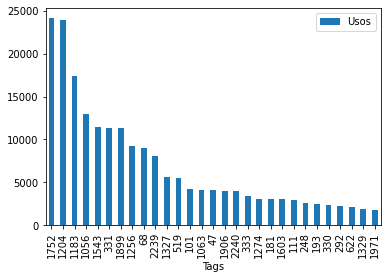

In [62]:
p1 = p1.sort_values(by='Usos', ascending=False)
p1.plot(kind='bar')
plt.xlabel("Tags")
plt.savefig("barras.png")

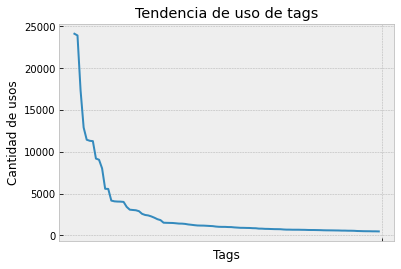

<Figure size 432x288 with 0 Axes>

In [74]:
p2= pqtGB[0:100]
plt.style.use('bmh')
plt.plot(p2['Tags'], p2['Usos'])
plt.title("Tendencia de uso de tags")
plt.xlabel("Tags")
plt.ylabel('Cantidad de usos')
plt.xticks('')   
plt.show()
plt.savefig('img1.png')

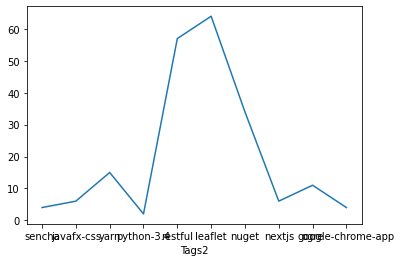

<Figure size 432x288 with 0 Axes>

In [44]:
plt.plot(p1["Tags"],p1["Usos"])
plt.xlabel("Tags2")
plt.show()
plt.savefig("linea.png")